<a href="https://colab.research.google.com/github/raffieeey/MasterResearchAutoML/blob/master/autosklearn/04A_Autosklearn_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt install gcc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [4]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
!apt-get install build-essential swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,288 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 144429 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [6]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   194  100   194    0     0   2179      0 --:--:-- --:--:-- --:--:--  2179
  Using cached https://files.pythonhosted.org/packages/ed/0f/4d7e42a9dfef3a1898e03cffa8f1cfcd1f96507d718808b2db584c6f8401/pyrfr-0.8.0.tar.gz
  Created wheel for pyrfr: filename=pyrfr-0.8.0-cp36-cp36m-linux_x86_64.whl size=2540843 sha256=8eaa125348519c7eba475d484cf11d464efdd321ed572a3e71811a0353ca988a
  Stored in directory: /root/.cache/pip/wheels/61/1a/d2/b5aee388a492a01946143d3c976b2ca810af537480e1f16999
Successfully built pyrfr
Processing /root/.cache/pip/wheels/12/52/83/d2d66a840968025d072ddb1cd776fdc5eb5e337e1cc887bc3f/smac-0.8.0-cp36-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/b4/4df37087a1d36755e3a3bfd2a30263f358d2dea21938240fa02313d45f51/sphinx_rtd_theme-0.4.3-py2.py3-none-any.whl


In [7]:
!pip install auto-sklearn

     |████████████████████████████████| 3.9MB 2.7MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.6.0-cp36-cp36m-linux_x86_64.whl size=4267284 sha256=cb171b37dd6bc9f4372269eaa41b3fac3ee13b235a35ffb61d739b349f7ed678
  Stored in directory: /root/.cache/pip/wheels/f2/23/80/ad8ee8b146f4f5ff02d87a3bf1dd7c27dc43a05631f7adc6a6
Successfully built auto-sklearn


In [8]:
!pip install pmlb
!pip install pytictoc

  Created wheel for pmlb: filename=pmlb-0.3-cp36-none-any.whl size=11918 sha256=403d74e6dba03c247bdfc104c52615f7ede1cfbf531ff64036be8efdd6981c92
  Stored in directory: /root/.cache/pip/wheels/5a/c7/a4/be59e63a2cb56f6c58f068305b95c212e0aac1a930fd77d6b0
Successfully built pmlb


In [9]:
%matplotlib inline
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def get_auc(labels, scores):
    fpr, tpr, thresholds = roc_curve(labels, scores)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


def get_aucpr(labels, scores):
    precision, recall, th = precision_recall_curve(labels, scores)
    aucpr_score = np.trapz(recall, precision)
    return precision, recall, aucpr_score


def plot_metric(ax, x, y, x_label, y_label, plot_label, style="-"):
    ax.plot(x, y, style, label=plot_label)
    ax.legend()
    
    ax.set_ylabel(x_label)
    ax.set_xlabel(y_label)


def prediction_summary(labels, predicted_score, info, plot_baseline=True, axes=None):
    if axes is None:
        axes = [plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)]

    fpr, tpr, auc_score = get_auc(labels, predicted_score)
    plot_metric(axes[0], fpr, tpr, "False positive rate","True positive rate", "{} AUC = {:.4f}".format(info, auc_score))
    if plot_baseline:
        plot_metric(axes[0], [0, 1], [0, 1], "False positive rate","True positive rate", "baseline AUC = 0.5", "r--")

    precision, recall, aucpr_score = get_aucpr(labels, predicted_score)
    plot_metric(axes[1], recall, precision, "Recall","Precision", "{} AUCPR = {:.4f}".format(info, aucpr_score))
    if plot_baseline:
        thr = (np.sum(labels)/len(labels))[0]
        plot_metric(axes[1], [0, 1], [thr, thr], "Recall","Precision", "baseline AUCPR = {:.4f}".format(thr), "r--")

    plt.show()
    return axes


def figure():
    fig_size = 4.5
    f = plt.figure()
    f.set_figheight(fig_size)
    f.set_figwidth(fig_size*2)

figure()

<Figure size 648x324 with 0 Axes>

In [0]:
from autosklearn.estimators import AutoSklearnClassifier
import autosklearn.metrics as metrics

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, log_loss
import numpy as np
import pandas as pd


class CheckBinomial:
  def __init__(self, checkunique):
    self._bintype = 'binomial' if pd.Series(checkunique).nunique() == 2 else 'multinomial'

  def MLMetrics(self):
    if self._bintype == 'binomial':
      return [metrics.accuracy,  metrics.roc_auc , metrics.log_loss]
    elif self._bintype == 'multinomial':
      return [metrics.accuracy, metrics.log_loss]

class MetricsCalc:
  def __init__(self, truth, predictions, probab, dattype):
    self.truth = truth
    self.predictions = predictions
    self._target = predictions
    self._probabmax = np.max(probab, axis=1)
    self._probab = probab
    self._type = dattype

  def acc(self):
    return float(accuracy_score(self.truth,self._target))

  def auc(self):
    if self._type == "binomial":
      return float(roc_auc_score(self.truth, self._probabmax))
    elif self._type == "multinomial":
      return np.nan 

  def logloss(self):
    return float(log_loss(self.truth, self._probab))
  
  def cm(self):
    return confusion_matrix(self.truth, self._target)
  
  def f1(self):
    if self._type == "binomial":
      return float(f1_score(self.truth, self._target, average='binary'))
    elif self._type == "multinomial":
      return float(f1_score(self.truth, self._target, average='macro'))

In [0]:
col_list = [x for x in df.columns if "classifier" in x]

________________________________________________________________________________
*** Dataset Name: adult ***
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.360209)
[WARNING] [2020-05-07 14:44:23,853:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:44:23,898:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.332059)
[WARNING] [2020-05-07 14:44:25,908:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:44:27,924:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07

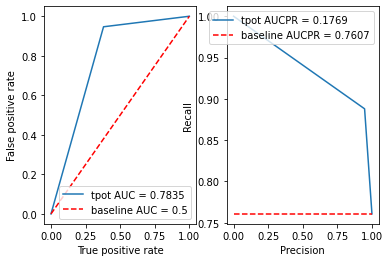

________________________________________________________________________________
*** Dataset Name: adult ***
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.368900)
[WARNING] [2020-05-07 14:46:21,425:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:46:21,463:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.358034)
[WARNING] [2020-05-07 14:46:23,472:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:46:25,485:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07

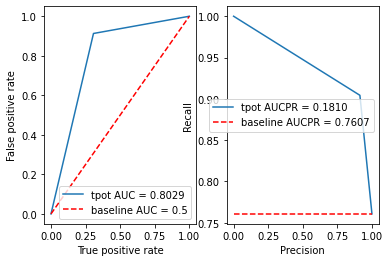

________________________________________________________________________________
*** Dataset Name: adult ***
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.365967)
[WARNING] [2020-05-07 14:48:19,492:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:48:19,513:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.332618)
[WARNING] [2020-05-07 14:48:21,518:EnsembleBuilder(1272380470):a1f5f33b1562b5706e870c202da1d4e5] No models better than random - using Dummy Score!
Elapsed time is 115.978329 seconds.
*** Top algorithm: *** random_forest
  classifier:__choice__  ... classifier:random_forest:n_estimators
0         random_forest  ...

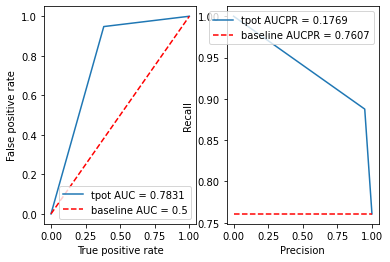

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
[WARNING] [2020-05-07 14:50:16,893:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:50:16,922:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.452391)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.480757)
[WARNING] [2020-05-07 14:50:18,942:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
Elapsed time is 115.865398 seconds.
*** Top algorithm: *** random_forest
  classifier:__choice__  ... classifier:random_forest:n_estimators
0         random_

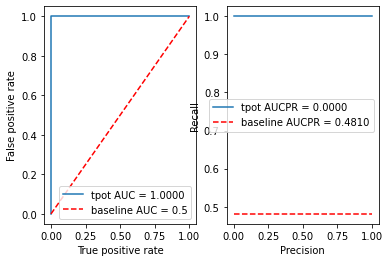

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
[WARNING] [2020-05-07 14:52:14,986:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:52:15,009:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.420552)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.475962)
[WARNING] [2020-05-07 14:52:17,020:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
Elapsed time is 116.634351 seconds.
*** Top algorithm: *** random_forest
  classifier:__choice__  ... classifier:random_forest:n_estimators
0         random_

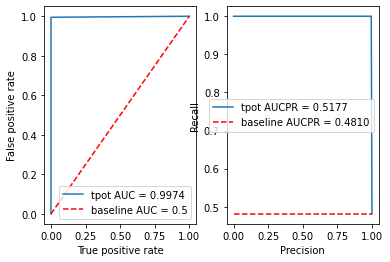

________________________________________________________________________________
*** Dataset Name: agaricus-lepiota ***
[WARNING] [2020-05-07 14:54:14,513:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:54:14,547:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.435925)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.472528)
[WARNING] [2020-05-07 14:54:16,560:EnsembleBuilder(1272380470):ade56074157b8a2aceb7b50d1f504bb6] No models better than random - using Dummy Score!
Elapsed time is 116.930336 seconds.
*** Top algorithm: *** random_forest
  classifier:__choice__  ... classifier:random_forest:n_estimators
0         random_

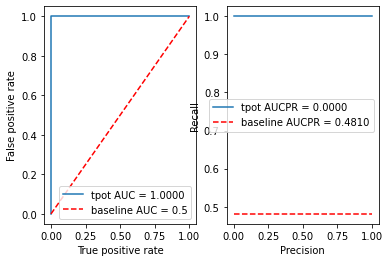

________________________________________________________________________________
*** Dataset Name: churn ***
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.509132)
[WARNING] [2020-05-07 14:56:12,413:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:56:12,449:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.448069)
[WARNING] [2020-05-07 14:56:14,459:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
Elapsed time is 116.456451 seconds.
*** Top algorithm: *** sgd
  classifier:__choice__  ...  classifier:sgd:l1_ratio
0                   sgd  ...             3.071228e-

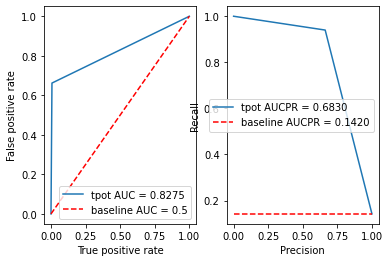

________________________________________________________________________________
*** Dataset Name: churn ***
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.498560)
[WARNING] [2020-05-07 14:58:09,911:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 14:58:09,923:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.447569)
[WARNING] [2020-05-07 14:58:11,929:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
Elapsed time is 116.358814 seconds.
*** Top algorithm: *** sgd
  classifier:__choice__  ...  classifier:sgd:power_t
0                   sgd  ...                0.564621

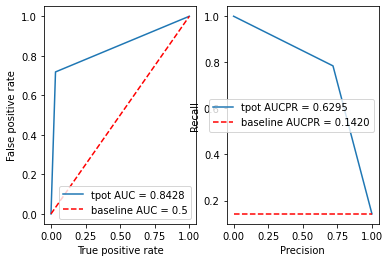

________________________________________________________________________________
*** Dataset Name: churn ***
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.513600)
[WARNING] [2020-05-07 15:00:07,165:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 15:00:07,196:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.438183)
[WARNING] [2020-05-07 15:00:09,205:EnsembleBuilder(1272380470):5c9bd2dfba4052b94360bacb53a25570] No models better than random - using Dummy Score!
Elapsed time is 116.204300 seconds.
*** Top algorithm: *** random_forest
  classifier:__choice__  ... classifier:random_forest:n_estimators
0         random_forest  ...

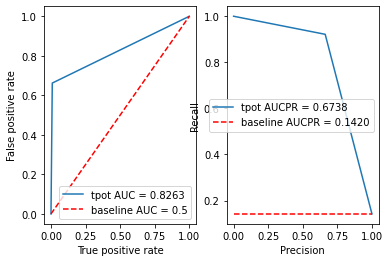

________________________________________________________________________________
*** Dataset Name: nursery ***
[WARNING] [2020-05-07 15:02:04,362:EnsembleBuilder(1272380470):a8016ad5cf63fabf26bf07bd7671667b] No models better than random - using Dummy Score!
[WARNING] [2020-05-07 15:02:04,391:EnsembleBuilder(1272380470):a8016ad5cf63fabf26bf07bd7671667b] No models better than random - using Dummy Score!
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.324423)
Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (119.489586)
[WARNING] [2020-05-07 15:02:06,402:EnsembleBuilder(1272380470):a8016ad5cf63fabf26bf07bd7671667b] No models better than random - using Dummy Score!
Elapsed time is 115.786372 seconds.
*** Top algorithm: *** sgd
  classifier:__choice__  ...  classifier:sgd:power_t
0                   sgd  ...                0.3764

In [69]:
from pmlb import classification_dataset_names, regression_dataset_names,fetch_data
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split
from pytictoc import TicToc
import pandas as pd

df_result = pd.DataFrame(columns=["dataset_name", "metrics_recorded", "AUC", "ACC","logloss", "f1_score"])

preds = {}
preds_prob = {}
cm_preds = {}
top_algo = {}
t = TicToc()


sel_clss_dtst = ['adult','agaricus-lepiota', 'churn', 'nursery', 'satimage','texture']
sel_rgrs_dtst = ['294_satellite_image','218_house_8L', '227_cpu_small', '503_wind', '344_mv','215_2dplanes']

ix = 0

for class_dtst in sel_clss_dtst:
  for metrics_test in [metrics.accuracy, metrics.roc_auc, metrics.log_loss]:
        print("_"*80)
        print(f"*** Dataset Name: {class_dtst} ***")
        df_result.loc[ix,"dataset_name"] = class_dtst
        df_result.loc[ix,"metrics_recorded"] = metrics_test
        X, y = fetch_data(class_dtst, return_X_y=True)
        c=CheckBinomial(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)
        y_train = pd.DataFrame(y_train).values.ravel()
        y_test = pd.DataFrame(y_test).values.ravel()
        list_metrics = c.MLMetrics()
        automl = AutoSklearnClassifier(seed=69, n_jobs=2, ml_memory_limit=2048,time_left_for_this_task=120)
        t.tic()
        automl.fit(X_train,y_train, metric=metrics_test if metrics_test in list_metrics else None)
        t.toc()
        inse = automl.show_models()
        df = pd.DataFrame(eval(inse.split("(")[2].split("))")[0].split("dataset_properties")[0]))
        col_list = [x for x in df.columns if "classifier" in x]
        top_algo[class_dtst] = df.loc[:,'classifier:__choice__'][0]
        print("*** Top algorithm: ***", df.loc[:,'classifier:__choice__'][0])
        print(df[col_list])
        preds[class_dtst] = automl.predict(X_test)
        preds_prob[class_dtst] = automl.predict_proba(X_test)
        p = MetricsCalc(y_test,preds[class_dtst], preds_prob[class_dtst], c._bintype )
        if c._bintype == "binomial":
          df_result.loc[ix,"AUC"] = p.auc()
          df_result.loc[ix,"ACC"] = p.acc()
          df_result.loc[ix,"logloss"] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          df_result.loc[ix,"f1_score"] = p.f1()
          prediction_summary( pd.DataFrame(y_test), preds[class_dtst], "tpot")
          ix+=1
        elif c._bintype == "multinomial":
          df_result.loc[ix,"AUC"] = p.auc()
          df_result.loc[ix,"ACC"] = p.acc()
          df_result.loc[ix,"logloss"] = p.logloss()
          cm_preds[class_dtst] = p.cm()
          df_result.loc[ix,"f1_score"] = p.f1()
          ix+=1

In [70]:
for i, val in enumerate(preds):
  print(preds[val])

[1 1 0 ... 1 1 1]
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 1 1 

In [0]:
for i, val in enumerate(preds):
  pd.DataFrame(preds[val]).to_csv(f"{val}.csv")

In [72]:
df_result

,dataset_name,metrics_recorded,AUC,ACC,logloss,f1_score
0,adult,accuracy,0.7117,0.868577,0.628683,0.916384
1,adult,roc_auc,0.646063,0.860184,0.638099,0.908531
2,adult,log_loss,0.726884,0.868987,0.301051,0.91671
3,agaricus-lepiota,accuracy,0.466499,1,0.100523,1
4,agaricus-lepiota,roc_auc,0.474978,0.997546,0.203342,0.997442
5,agaricus-lepiota,log_loss,0.494114,1,0.000346545,1
6,churn,accuracy,0.120227,0.946,0.624985,0.77686
7,churn,roc_auc,0.296201,0.932,0.6383,0.75
8,churn,log_loss,0.296136,0.944,0.176672,0.770492
9,nursery,accuracy,NaN,0.981481,0.490124,0.971172


In [73]:
import pprint
pprint.pprint(cm_preds)

{'adult': array([[ 723,  446],
       [ 194, 3522]]),
 'agaricus-lepiota': array([[423,   0],
       [  0, 392]]),
 'churn': array([[425,   4],
       [ 24,  47]]),
 'nursery': array([[432,   0,   0,   0],
       [  0, 415,  12,   0],
       [  0,   9, 395,   0],
       [  0,   8,   0,  25]]),
 'satimage': array([[150,   0,   1,   0,   2,   0],
       [  0,  69,   0,   0,   1,   0],
       [  1,   0, 130,   5,   0,   0],
       [  0,   0,  11,  43,   0,   9],
       [  8,   1,   1,   0,  57,   4],
       [  0,   0,   4,   9,   0, 138]]),
 'texture': array([[45,  2,  0,  0,  1,  0,  2,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0, 49,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 49,  0,  0,  0],
       [ 0,  0,  0, 

In [74]:
top_algo

{'adult': 'random_forest',
 'agaricus-lepiota': 'random_forest',
 'churn': 'random_forest',
 'nursery': 'random_forest',
 'satimage': 'random_forest',
 'texture': 'sgd'}